In [1]:
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("e_waste dataset final.csv")


# Interact data visualization project
## Topic: E-waste & Environment
***
## Dataset introduction
- *With the rapid development of digital technology and the gradual acceleration of the replacement of electronic equipment, the e-waste generated in the world is increasing. For example, discarded computers, smart phones, household appliances, etc., which may contain toxic and harmful ingredients such as lead, mercury and cadmium, improper disposal of which will pose a serious threat to human health and the environment. At the same time, the recycling and reuse of e-waste also involves the issue of carbon footprint and resource recycling, bringing sustainable development issues to the discussion.*

- Data source's link: 'https://www.kaggle.com/datasets/arifmia/e-waste-data'.

- This dataset involves about 3000 pieces of information about e-waste recycling, mainly involving the following variables：
   1. Numerical variables:
      - Year of purchase (discrete variable): Indicates the device life cycle.
      - Quantity (discrete variable): The number of the equipments.
      - Weight (discrete variable): Used to assess the environmental impact of current weight waste disposal. (Unit: kg)
      - Recycled price (continous variable): Used to assess the economics value of electronic waste. (Unit: USD)
      - Carbon footprint (continuous variable): Carbon emissions generated during equipment recycling and disposal. (Unit: kg co2-eq)
   2. Categorial variables:
      - Product information: Brand, model, categorial.
      - Conditions (Working, partically broken, broken)
      - Recycle methods (Manual, automated, both)
      - Location (London, Shanghai, Dhaka)
      - Recycling facility (Facility A, Facility B, Facility C, Facility D)
      - End use (E-Waste Disposal, Parts for Electronics, Raw Materials)
      - Toxic components (Lead, Mercury, Cadmium, None)
      - E-Waste collector (Green Electronics, EcoWaste Solutions, E-Waste Inc)
      - Exported to (USA, China, Germany)
- Data Limitations note：The carbon footprint data in this study only considered the emissions in the recycling and transportation stage, and did not include the carbon footprint in the production and use stages of the equipment. As a result, the high energy consumption of appliances during the use phase is not reflected in the data, which can result in the carbon footprint of various devices looking similar.


## Dataset overview and information

In [3]:
df = pd.read_csv('e_waste dataset final.csv')
pd.concat([df.head(), df.tail()])

,ID,Item_Name,Brand,Model,Category,Year_of_Purchase,Condition,Quantity,Weight_kg,Recycle_Method,Location,Recycling_Facility,Collection_Date,End_Use,Recycled_Price_USD,Toxic_Components,E-Waste_Collector,Carbon_Footprint,Exported_To
0,8636,Washing Machine,Panasonic,Panasonic Model 472,Appliance,2018,Broken,2,69.65,Manual,London,Facility B,2024/7/24,E-Waste Disposal,163.41,Lead,Green Electronics,2.90,China
1,2686,Air Conditioner,Xiaomi,Xiaomi Model 921,Appliance,2013,Partially Working,1,29.60,Automated,London,Facility A,2024/5/28,Raw Materials,140.15,Mercury,EcoWaste Solutions,16.21,Germany
2,1491,Headphone,LG,LG Model 829,Electronics,2014,Partially Working,3,0.63,Both,Shanghai,Facility C,2024/4/20,Parts for Electronics,47.65,Cadmium,EcoWaste Solutions,1.05,China
3,2032,Headphone,Sony,Sony Model 723,Electronics,2013,Broken,5,0.77,Manual,Dhaka,Facility C,2024/1/27,Parts for Electronics,26.41,Lead,Green Electronics,18.62,Germany
4,5617,Refrigerator,Dell,Dell Model 751,Appliance,2015,Working,2,79.93,Manual,Shanghai,Facility D,2024/1/4,Parts for Electronics,114.50,Mercury,EcoWaste Solutions,9.36,USA
2995,5741,Microwave,Xiaomi,Xiaomi Model 908,Appliance,2023,Working,3,12.39,Automated,Berlin,Facility A,2024/3/28,Raw Materials,168.57,NaN,Green Electronics,9.56,India
2996,3074,Laptop,HP,HP Model 159,Computers,2012,Working,1,2.21,Both,Shanghai,Facility B,2024/9/9,Parts for Electronics,47.62,Cadmium,E-Waste Inc.,19.64,India
2997,2253,Washing Machine,Samsung,Samsung Model 422,Appliance,2019,Working,3,70.32,Automated,New York,Facility B,2023/12/6,Raw Materials,63.16,NaN,Green Electronics,15.67,Brazil
2998,2576,Microwave,Sony,Sony Model 606,Appliance,2020,Partially Working,4,12.30,Manual,Shanghai,Facility C,2024/2/14,Raw Materials,170.68,NaN,EcoWaste Solutions,16.18,Brazil
2999,799,Laptop,Panasonic,Panasonic Model 136,Computers,2021,Broken,5,1.86,Automated,New York,Facility B,2024/10/27,Parts for Electronics,193.59,Mercury,Green Electronics,15.22,Brazil


In [4]:
df.shape

(3000, 19)

In [5]:
print("Data Overview:")
df.info()

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3000 non-null   int64  
 1   Item_Name           3000 non-null   object 
 2   Brand               3000 non-null   object 
 3   Model               3000 non-null   object 
 4   Category            3000 non-null   object 
 5   Year_of_Purchase    3000 non-null   int64  
 6   Condition           3000 non-null   object 
 7   Quantity            3000 non-null   int64  
 8   Weight_kg           3000 non-null   float64
 9   Recycle_Method      3000 non-null   object 
 10  Location            3000 non-null   object 
 11  Recycling_Facility  3000 non-null   object 
 12  Collection_Date     3000 non-null   object 
 13  End_Use             3000 non-null   object 
 14  Recycled_Price_USD  3000 non-null   float64
 15  Toxic_Components    2237 non-null   obje

In [6]:
df.columns

Index(['ID', 'Item_Name', 'Brand', 'Model', 'Category', 'Year_of_Purchase',
       'Condition', 'Quantity', 'Weight_kg', 'Recycle_Method', 'Location',
       'Recycling_Facility', 'Collection_Date', 'End_Use',
       'Recycled_Price_USD', 'Toxic_Components', 'E-Waste_Collector',
       'Carbon_Footprint', 'Exported_To'],
      dtype='object')

In [7]:
df.dtypes

ID                      int64
Item_Name              object
Brand                  object
Model                  object
Category               object
Year_of_Purchase        int64
Condition              object
Quantity                int64
Weight_kg             float64
Recycle_Method         object
Location               object
Recycling_Facility     object
Collection_Date        object
End_Use                object
Recycled_Price_USD    float64
Toxic_Components       object
E-Waste_Collector      object
Carbon_Footprint      float64
Exported_To            object
dtype: object

In [8]:
print("Numerical Data Statistics:")
num_cols = ["Year_of_Purchase", "Quantity", "Weight_kg", "Recycled_Price_USD", "Carbon_Footprint"]
df_numeric = df[num_cols]  
df_numeric.describe().round(2)

Numerical Data Statistics:


,Year_of_Purchase,Quantity,Weight_kg,Recycled_Price_USD,Carbon_Footprint
count,3000.00,3000.00,3000.00,3000.00,3000.00
mean,2016.62,3.00,25.89,101.50,10.66
std,4.07,1.42,29.65,56.30,5.44
min,2010.00,1.00,0.10,5.09,1.01
25%,2013.00,2.00,0.93,52.32,5.99
50%,2017.00,3.00,12.47,99.89,10.72
75%,2020.00,4.00,30.47,151.54,15.34
max,2023.00,5.00,80.49,199.99,19.99


In [9]:
print("Unique Values Count:")
print(df.nunique())

Unique Values Count:
ID                    2566
Item_Name                8
Brand                    8
Model                 2484
Category                 4
Year_of_Purchase        14
Condition                3
Quantity                 5
Weight_kg              684
Recycle_Method           3
Location                 6
Recycling_Facility       4
Collection_Date        365
End_Use                  3
Recycled_Price_USD    2785
Toxic_Components         3
E-Waste_Collector        3
Carbon_Footprint      1520
Exported_To              5
dtype: int64


In [10]:
missing_values = df.isnull().sum()
print("Missing Values Count:")
print(missing_values[missing_values > 0])

Missing Values Count:
Toxic_Components    763
dtype: int64


In [11]:
print("\nPercentage of missing values:")
perc = round(df.isnull().sum() / len(df), 2) * 100
missing_columns = perc[perc > 0]
missing_columns


Percentage of missing values:


Toxic_Components    25.0
dtype: float64

The 763 missing values in this column represent the absence of toxic or harmful substances.

***
## Dataset exploration


### 1. Observe the recycle method for devices in different conditions.

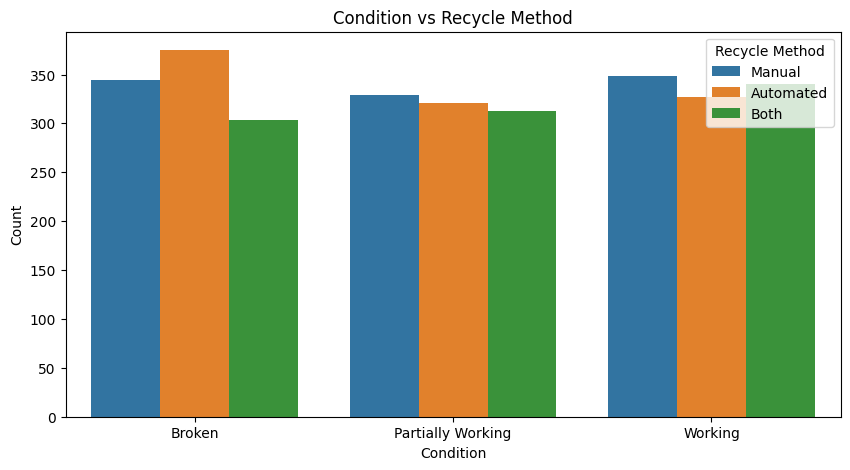

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Condition", hue="Recycle_Method")
plt.title("Condition vs Recycle Method")
plt.ylabel("Count")
plt.legend(title="Recycle Method")
plt.show()

**Observe results:**
  1. Equipment that has been broken tends to be recycled automatically.
     - Main reason: Manual recycling is more suitable for equipment with repair value, but for equipment that is completely damaged, it may not be worth the cost of manual processing.
  2. Partially Working equipment is recovered in a balanced manner.
     - Main reason: Perhaps because they still have repair value, manual and automated recycling coexist.
  3. A certain percentage of fully Working equipment still goes into recycling.
     - Main reason: Old equipment replacement, some normal equipment loss of market demand, there is a secondary market or renovate.



### 2. The export direction of electronic waste.

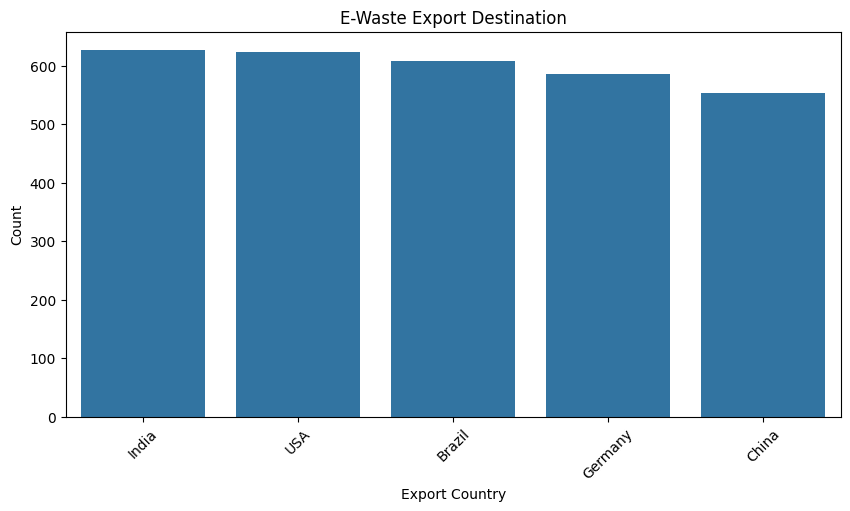

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Exported_To", order=df["Exported_To"].value_counts().index)
plt.xticks(rotation=45)
plt.title("E-Waste Export Destination")
plt.xlabel("Export Country")
plt.ylabel("Count")
plt.show()

The chart shows that each country accepts e-waste fairly evenly. Further view that **India and the USA** receive the highest amounts of e-waste, followed closely by **Brazil, Germany, and China**. This suggests a significant flow of electronic waste to both developed and developing countries, raising concerns about environmental impact and recycling capabilities.

### 3. Carbon footprint by export destination and recycle method.

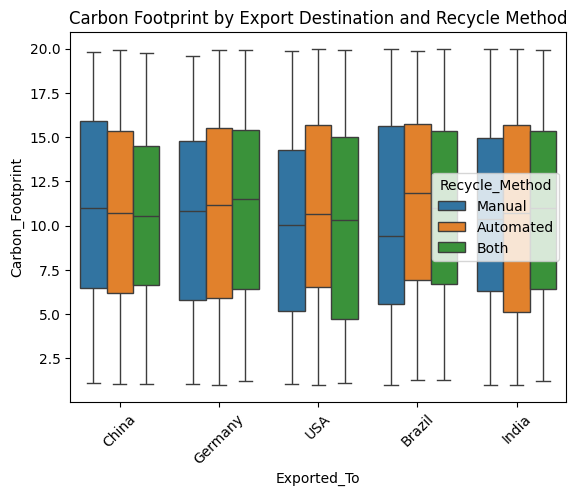

In [15]:
sns.boxplot(data=df, x="Exported_To", y="Carbon_Footprint", hue="Recycle_Method")
plt.title("Carbon Footprint by Export Destination and Recycle Method")
plt.xticks(rotation=45)
plt.show()

**Observe results:**
  1. The difference in energy consumption between automated and manual recycling may be small.
     - Main reason: The mechanized process of automated recycling consumes electricity but is more efficient, reducing the carbon emissions of manual operations. Manual recycling, while manually operated, may require longer processing times and may also involve additional logistics and storage carbon emissions.
  2. Different countries have similar carbon footprints.
     - Main reason: Transport distance variance.

### 4. Category distribution of electronic waste.

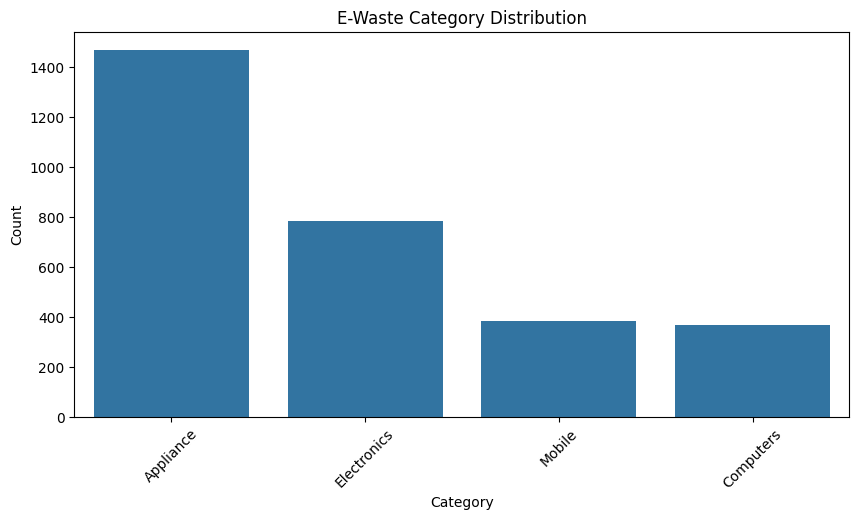

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("E-Waste Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**Analysis of E-Waste Distribution:**

The chart shows that **appliances** generate the most e-waste and **computers** contribute significantly less, possibly due to higher recycling rates or longer usage lifespans.



### 5. Carbon footprint distribution of various types of e-waste under different recycling methods.

Violin plot

<Axes: xlabel='Category', ylabel='Carbon_Footprint'>

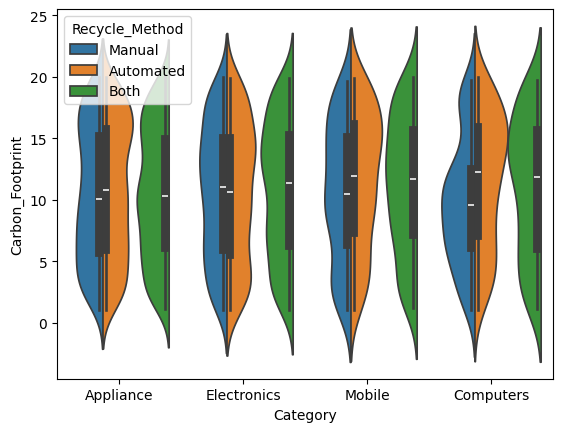

In [17]:
sns.violinplot(x="Category", y="Carbon_Footprint", hue="Recycle_Method", data=df, split=True)

**Observe result:**

1. Carbon footprint distribution of different types of e-waste.
   - Appliance and Electronics: Possibly due to the larger size and complex materials, the carbon footprint is higher.
   - Mobile phones and computers: Have low and stable carbon footprints because of their expensive materials and sophisticated recycling technologies.

2. The impact of recycling methods on carbon footprint.
   - Automatic recycling is more environmentally friendly in some categories, but may increase the carbon footprint in others.
   - Manual recycling may be more suitable for certain products, but the transportation and manual handling involved can bring additional carbon emissions.
   - Mixed recycling works differently on different categories and may be the direction of future optimization.

### 6. Toxic component correlation.

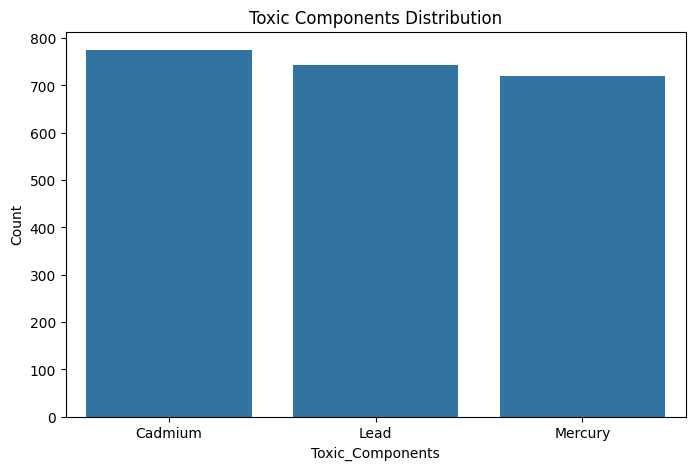

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Toxic_Components", order=df["Toxic_Components"].value_counts().index)
plt.title("Toxic Components Distribution")
plt.ylabel("Count")
plt.show()

We found that the distribution of the three toxic components was relatively balanced, it shows that these three toxic components are common in e-waste.

So we will conduct further analysis to look at the relationship between different categories of devices and toxic components.

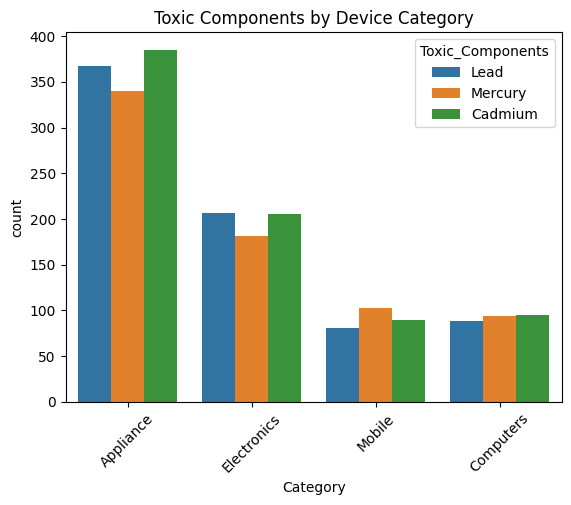

In [19]:
sns.countplot(data=df, x="Category", hue="Toxic_Components")
plt.title("Toxic Components by Device Category")
plt.xticks(rotation=45)
plt.show()

**Observe result:**
  1. Appliances are the main source of toxic components.
     - Cadmium is the highest in household appliances, slightly higher than lead and mercury.
  2. Electronics had moderate levels of toxic components.
     - Electronics contain moderate levels of Lead, Mercury, and Cadmium, significantly lower than appliances but higher than mobile devices and computers. Among them, lead and cadmium are slightly higher than mercury.
  3. Mobile devices contain fewer toxic ingredients.
     - Mobile devices contain significantly less toxic ingredients, but slightly more Mercury.



### 7. E-waste recycling price distribution.

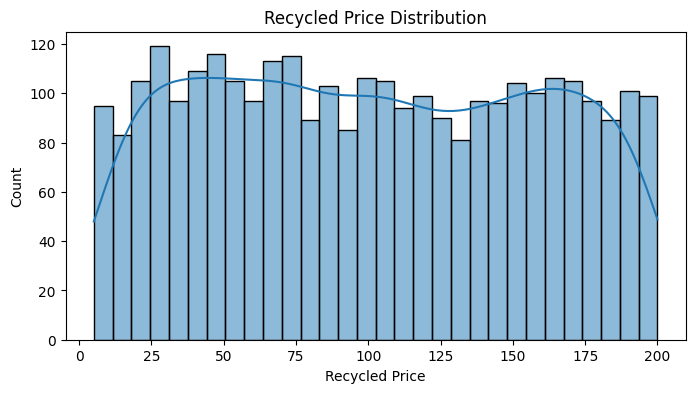

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Recycled_Price_USD"], bins=30, kde=True)
plt.title("Recycled Price Distribution")
plt.xlabel("Recycled Price")
plt.ylabel("Count")
plt.show()

**Observe results:**
  1. The recycling price of e-waste is distributed between 0-200 USD, showing a relatively uniform distribution without obvious skew.
  2. The equal number of low-priced devices (< 50 USD) and high-priced devices (>150 USD) indicates that there are both low-value recycling devices and high-value devices on the market.
     - Main reasons: Some e-waste still has high economic value and can be refurbished or recycled.

Therefore, we further analyzed the recycling prices of different categories of e-waste.

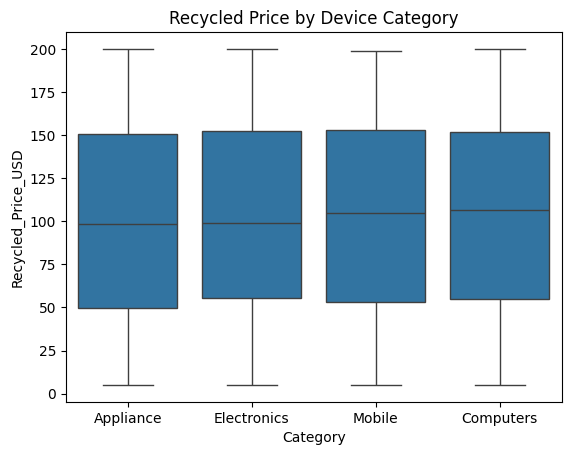

In [21]:
sns.boxplot(data=df, x="Category", y="Recycled_Price_USD")
plt.title("Recycled Price by Device Category")
plt.show()

**Conclusion:**

We find that the recycling price of e-waste may be based on the value of the material (such as metals, plastics, rare metals) rather than the type of device.



### 8. Comparing years of e-waste purchase with quantity.

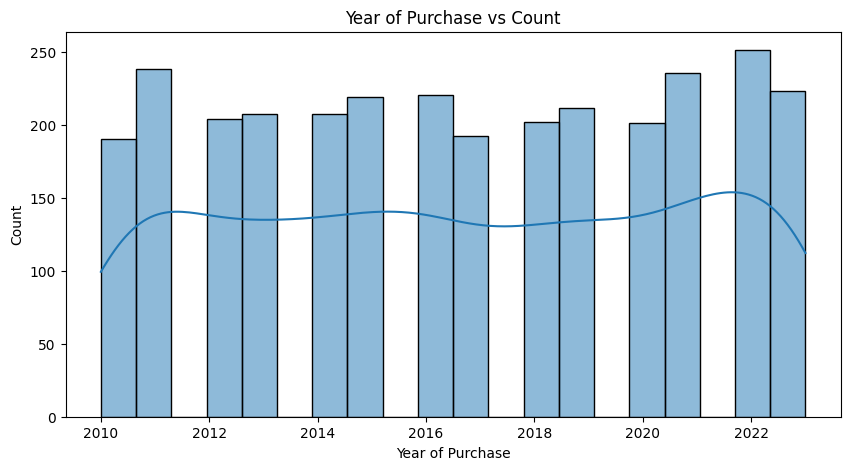

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Year_of_Purchase"], bins=20, kde=True)
plt.title("Year of Purchase vs Count")
plt.xlabel("Year of Purchase")
plt.ylabel("Count")
plt.show()

**Obverse results:**
  1. The number of electronic products scrapped is relatively uniform across different years of purchase.
     - Main reason: The average life of electronic products is relatively stable and the replacement speed of electronic products is accelerating.
  2. The amount of e-waste was higher in 2022 and 2012. 
     - Main reasons: 
        - In 2012: Large appliances (such as refrigerators, washing machines) typically have a service life of 10-12 years and may begin to be scrapped in large numbers in 2022.
        - In 2022: It includes devices that are rapidly being replaced (such as smartphones), and may be related to changes in demand for electronic products after COVID-19 (e.g. surge in sales of telecommuting devices, laptops).
  3. The amount of e-waste was slightly lower during 2015-2019.
     - Main reasons: Electronic equipment in this period is more durable, so it has not yet fully entered the scrap cycle. Some equipment is still in use and has not yet entered the recycling system.

### 9. Correlation heatmap.

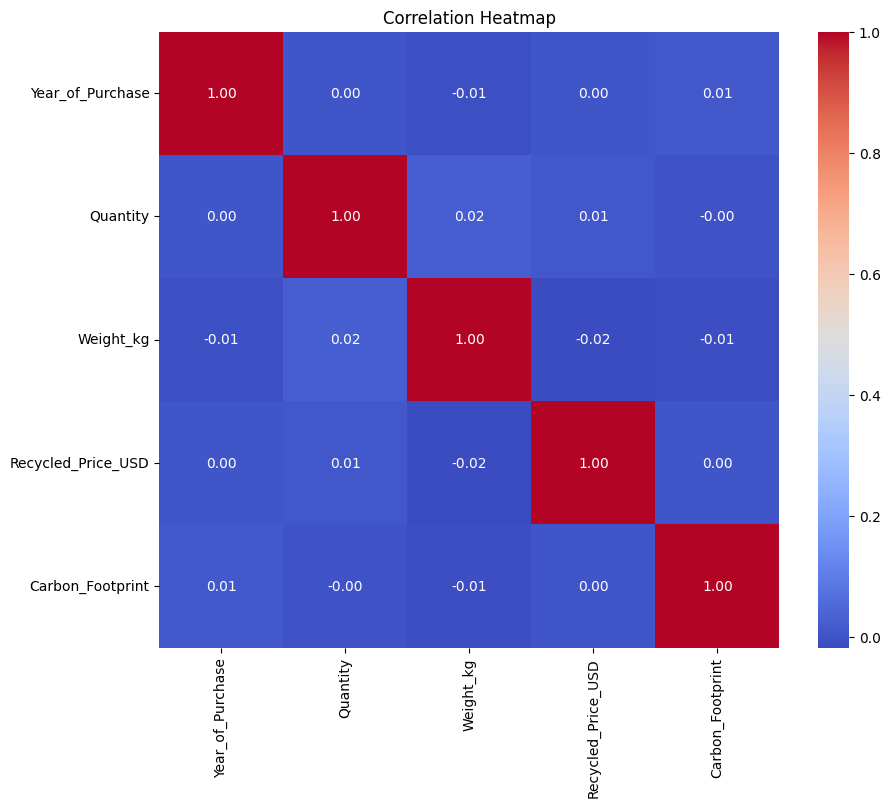

In [23]:
numerical_columns = ['Year_of_Purchase','Quantity','Weight_kg','Recycled_Price_USD','Carbon_Footprint']
# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Correlation Analysis:**

The heatmap shows that there are no significant correlations between the numerical variables, as all values are close to 0. This indicates that none of the variables have a strong linear relationship.


### 10. Globle flow of e-waste.

**Count the amount of e-waste exported by each country**

In [25]:
# Count the amount of e-waste exported by each country
e_waste_flow = df['Exported_To'].value_counts().reset_index()
e_waste_flow.columns = ['Country', 'E-Waste Quantity']
e_waste_flow

,Country,E-Waste Quantity
0,India,627
1,USA,624
2,Brazil,609
3,Germany,586
4,China,554


**Mapping the global flow of e-waste (Choropleth Map)**

In [26]:
e_waste_map = px.choropleth(e_waste_flow, locations = "Country", locationmode = "country names",
                             color = "E-Waste Quantity", hover_name = "Country",
                             title = "Global Flow of E-Waste",
                             )

e_waste_map.show()

**visualized analysis**

China, India, Pakistan, Bangladesh - these countries have become the main destinations for global e-waste disposal due to the low cost of recycling. This chart shows that **India and the USA** receive the highest amounts of e-waste, followed closely by **Brazil, Germany, and China**. This suggests a significant flow of electronic waste to both developed and developing countries, raising concerns about environmental impact and recycling capabilities.
***